In [25]:
import pandas as pd
dados = pd.read_csv('../dados/aluguel_residencial.csv', sep=';')
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21821,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
21822,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
21823,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
21824,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


In [26]:
dados.Valor.mean()

5046.172821405663

In [27]:
bairros = ['Copacabana', 'Barra da Tijuca', 'Ipanema', 'Leblon', 'Botafogo']
selecao = dados.Bairro.isin(bairros)
dados = dados[selecao]
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
10,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,66.67,Apartamento
11,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,53.50,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21815,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento
21816,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0,37.50,Apartamento
21817,Apartamento,Ipanema,3,1,2,150,15000.0,1400.0,600.0,100.00,Apartamento
21820,Casa de Condomínio,Barra da Tijuca,5,3,4,450,15000.0,1711.0,2332.0,33.33,Casa


In [28]:
grupo_bairro = dados.groupby('Bairro')
grupo_bairro

In [29]:
grupo_bairro.groups.get('Copacabana')

Index([    0,     9,    10,    11,    24,    25,    28,    31,    86,    91,
       ...
       21707, 21713, 21736, 21743, 21780, 21783, 21795, 21809, 21810, 21815],
      dtype='int64', length=2644)

In [30]:
for bairro, data in grupo_bairro:
    print(f'{bairro} -=> {data.Valor.mean().round(2)}')

Barra da Tijuca -=> 7069.55
Botafogo -=> 8791.83
Copacabana -=> 4126.68
Ipanema -=> 9352.0
Leblon -=> 8746.34


In [31]:
grupo_bairro.Valor.mean()

Bairro
Barra da Tijuca    7069.552938
Botafogo           8791.828179
Copacabana         4126.677005
Ipanema            9352.001134
Leblon             8746.344992
Name: Valor, dtype: float64

In [32]:
grupo_bairro[['Valor', 'Condominio']].mean().round(6)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.552938,3591.013461
Botafogo,8791.828179,976.281787
Copacabana,4126.677005,1148.682300
Ipanema,9352.001134,2244.442177
Leblon,8746.344992,2107.184420


In [33]:
grupo_bairro.Valor.describe().round(3)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.553,11874.152,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.828,152202.408,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.677,3611.410,100.0,2000.0,3000.0,4800.0,35000.0
Ipanema,1764.0,9352.001,8219.718,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.345,7004.043,100.0,4500.0,7000.0,10500.0,100000.0


In [36]:
grupo_bairro.Valor.aggregate(['min', 'max', 'sum', 'mean'])\
    .rename(columns = {'min': 'Valor min', 'max': 'Valor Max'})\
    .round(3)

,Valor min,Valor Max,sum,mean
Bairro,,,,
Barra da Tijuca,800.0,600000.0,27309683.0,7069.553
Botafogo,700.0,4500000.0,7675266.0,8791.828
Copacabana,100.0,35000.0,10910934.0,4126.677
Ipanema,1200.0,90000.0,16496930.0,9352.001
Leblon,100.0,100000.0,11002902.0,8746.345


In [37]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Aluguel Médio por Bairro')

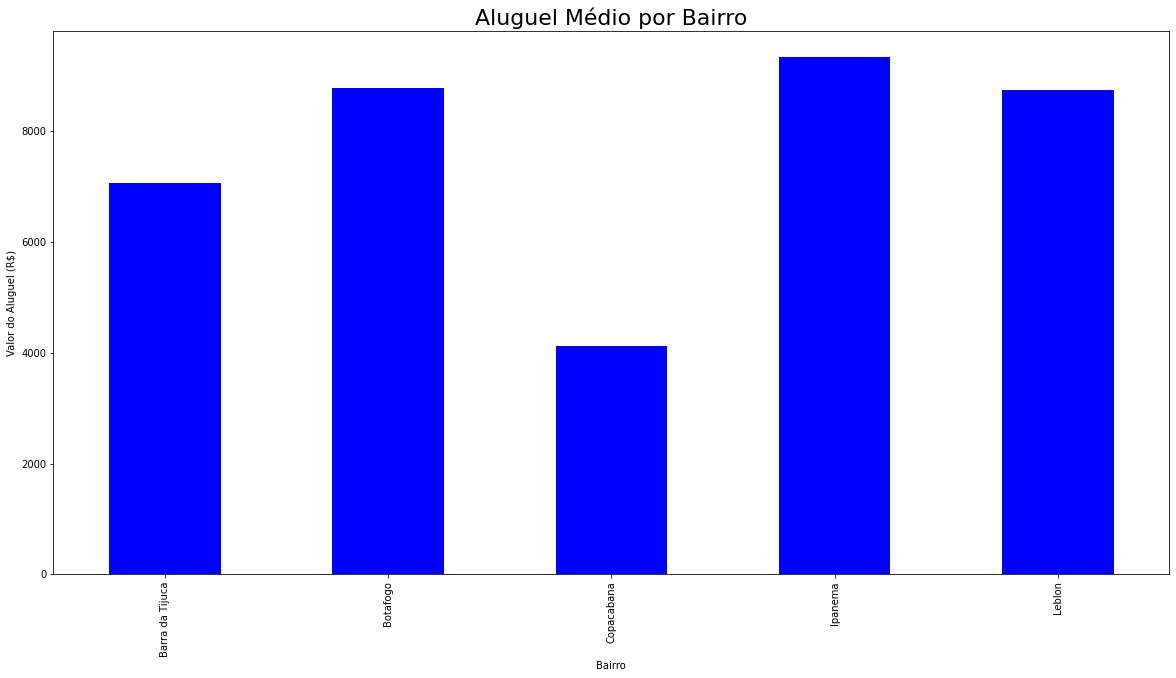

In [40]:
plt.rc('figure', figsize = (20, 10)) # plt.rcParams['figure.figsize'] = (20,10)

fig = grupo_bairro.Valor.mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel (R$)')
fig.set_title('Aluguel Médio por Bairro', {'fontsize': 22})

<Axes: xlabel='Bairro'>

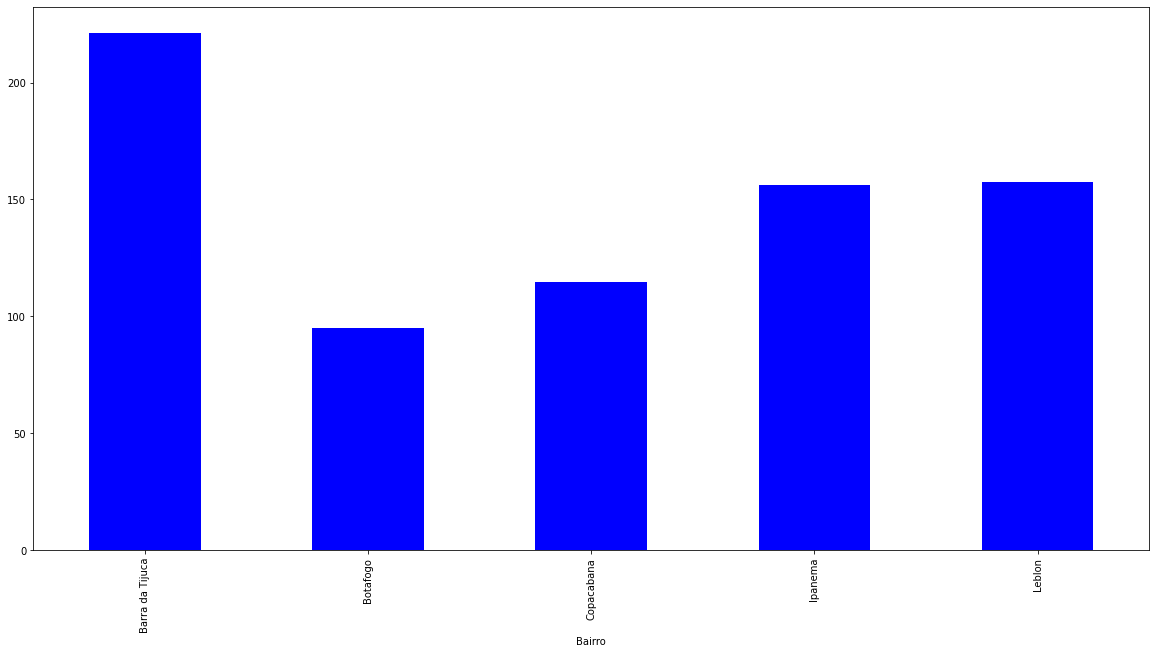

In [45]:
grupo_bairro.Area.mean().plot.bar(color = 'blue')